# *Frequentist Model & Analysis*
Using Ordinary Least Squares (OLS) and Residual plotting to analyze the frequentist approach.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog
from google.colab import files

## *Initial Model Analysis*

In [ ]:
# Load the data
uploaded = files.upload()

df = pd.read_excel('Customer Purchase DataSet.xlsx')


# Add binary boolean treatment indictor at $80
df['Treatment'] = (df['Dollars Spent 2021'] >= 80).astype(int)

# Inspect first few rows of the dataframe with Treatment addition
print(df.head())

Saving Customer Purchase DataSet.xlsx to Customer Purchase DataSet (1).xlsx
                            Customer ID  Dollars Spent 2021  \
0  9c7cdc4c-18fd-47ba-a304-a69fd69e4326           45.636204   
1  9e30f633-4dc3-4200-831c-a5dacc53ed13           40.311935   
2  342178ad-b68d-410d-a840-2d73624f9ba2           29.037670   
3  8f4657d9-a63a-4dfa-b429-d31cb3633d79           97.266983   
4  c18da3ee-7005-49da-abf0-8070170f3dc8           44.905178   

   Dollars Spent 2022  Treatment  
0           69.364189          0  
1           65.053696          0  
2           61.948933          0  
3          112.984993          1  
4           51.551075          0  


In [ ]:
# Define independent and dependent variables according to initial model specifications
X = df['Treatment']
y = df['Dollars Spent 2022']

X = sm.add_constant(X)

In [ ]:
# Fit the OLS regression model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Dollars Spent 2022   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 2.790e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:19:10   Log-Likelihood:                -90186.
No. Observations:               20000   AIC:                         1.804e+05
Df Residuals:                   19998   BIC:                         1.804e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.5704      0.167    326.464      0.0

### **Initial model OLS interpretations:**

#### **Overall Model**
**R-squared: 0.582:**
*   The R-squared value indicates that 58.2% of the variation in Dollars Spent 2022 can be explained by the model, which includes the constant and treatment as predictors.
*   While 0.582 indicates a moderate to good fit, it also means that 41.8% of the variation remains unexplained.

#### **Coefficients**
**Constant (Intercept) Coefficient:  54.5704:**
*   The coefficient value of the constant represents the predicted average 2022 dollar spending for customers who did not receive the treatment.

**Treatment Coefficient: 75.9865:**
*   The coefficient value represents the predicted average additional 2022 dollar spending for customers who did receive the treatment, compared to customers who did not receive the gift.
*   The model suggests that customers who received the surprise gift spent nearly $76 more on average than those who did not.


**const and Treatment P>|t|: 0.000:**
*  A P-value of 0.000 means the constant and treatment effects are statistically significant and have a meaningful impact on 2022 customer spending.

#### **Residual Analysis**

**Omnibus: 4891.230:**
*  The Omnibus value gives insight based on skewness and kurtoisis(tailedness). The given large value paired with a small Prob(Omnibus) value of 0.000 indicates that the residuals significantly deviates from a normal distribution.

**Skew: 1.140:**
*  Measuring the asymmetry of the residuals, a skew value of 1.140 indicates that the residuals are positively skewed.

### **OLS Takeaways:**

*   The R-squared of 0.582 indicates that the model explains about 58.2% of the variance in spending, meaning that while the model is decent, there may be other variables that could further improve it.
*  The results of the residual analysis values suggest that the model's residuals are not normally distribuetd and that the model tends to under-predict high values of the dependant variable.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

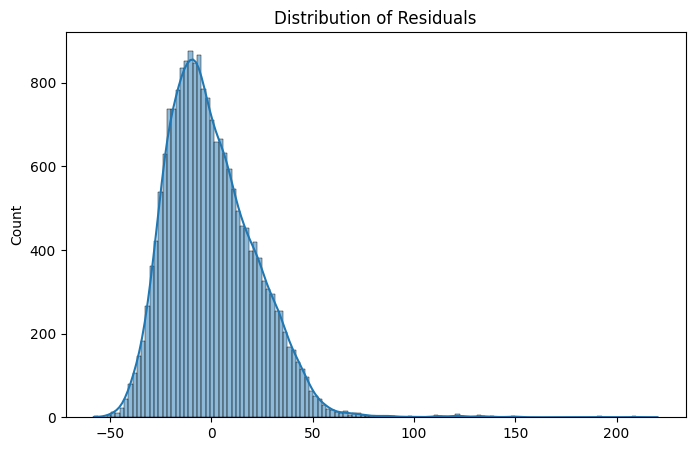

In [ ]:
# Checking residuals
y_pred = results.fittedvalues
residuals = results.resid

# Distribution of residuals through a histogram
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

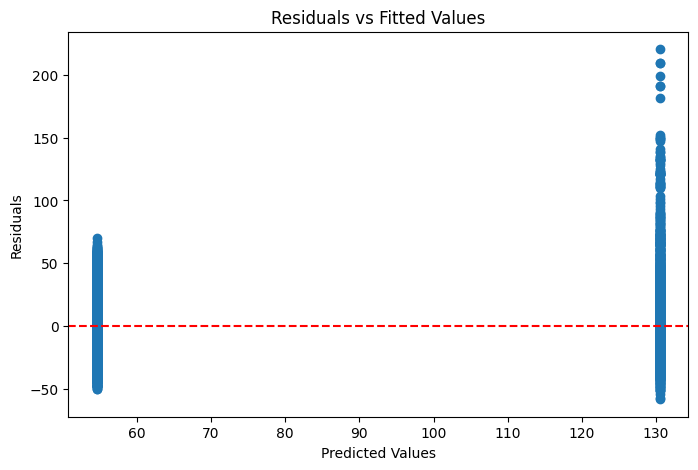

In [ ]:
# Residuals vs fitted values through a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### **Initial Model Residual Graph Interpretations:**

**Distribution of Residuals Histogram**:
*   Slight visually apparent right skew, indicating that the model errors are not normally distributed over all predictions.
*   The long right tail suggests there are large underpredictions.

**Residuals vs Fitted Values Scatter Plot**
*   Residuals cluster heavily at the left (lower predicted values) and at the right (higher predicted values).
*   Visible outlier residuals at the higher predicted values.


### **Residual Analysis Takeaways:**

*   **Heteroscedasticity:** Refers to a situation where the variance of the errors (or residuals) is not constant across all levels of the independent variables.
  *   The heavy clustering seen in the scatter plot suggests the presence of heteroscedasticity since the variance of residuals is not constant across the range of predicted values.

## *Interaction Linear Regression Model Analysis*

In [ ]:
# Defining the interaction effect and integrating into the regression

# Define the interaction term
df['Interaction'] = df['Dollars Spent 2021'] * df['Treatment']

# Define independent variables
X = df[['Dollars Spent 2021', 'Treatment', 'Interaction']]
# Add constant term for intercept
X = sm.add_constant(X)
# Define dependent variable
y = df['Dollars Spent 2022']

# Fit the OLS model
model_with_interaction = sm.OLS(y, X)
results_interaction = model_with_interaction.fit()
print(results_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     Dollars Spent 2022   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 7.054e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:19:13   Log-Likelihood:                -74425.
No. Observations:               20000   AIC:                         1.489e+05
Df Residuals:                   19996   BIC:                         1.489e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.8443      0

### **Interaction model OLS interpretations:**

#### **Overall Model**
**R-squared: 0.914**:
*   The R-squared value indicates that 91.4% of the variation in Dollars Spent 2022 can be explained by the model, which includes the constant, 2021 spending, and treatment as predictors.
*   0.914 indicates a good fit, meaning that only 8.6% of the variation remains unexplained and that the model fits the data well.

#### **Coefficients**
**Constant (Intercept) Coefficient:  9.8443**
*   The coefficient value of the constant represents the predicted average 2022 dollar spending for customers who's 2021 spending is $0 and did not receive the treatment.

**Dollars Spent 2021 Coefficient:  1.1017**
*   The coefficient value of 2021 spending represents the expected increase in dollar amount spent in 2022 for every additional $1 spent in 2021. For every additional \$1 spent in 2021, customers are expected to spend \$1.10 more in 2022.
*   The relationship shows that customers who already spent more in 2021 are likely to spend even more in 2022.

**Treatment Coefficient:  12.4675**
*   The coefficient value represents the predicted average additional 2022 dollar spending for customers who did receive the treatment, compared to customers that did not.
*   The model suggests that customers who received the surprise gift spent $12.46 more on average in 2022 than those who did not.

**Interaction Coefficient:  -0.1190**
*   The coefficient value represents how the effect of 2021 spending changes depending on the receiving of the treatment.
*   This negative interaction term suggests diminishing returns: the more a customer spends in 2021, the less impact the treatment (surprise gift) has on their spending in 2022.

**P>|t|: 0.000**:
*  A P-value of 0.000 for all effects means that they are statistically significant and have a meaningful effect on 2022 customer spending.

#### **Residual Analysis**
**Omnibus: 2.531:**
*  The smaller Omnibus value, combined with the Prob(Omnibus) value of 0.282, indicates that the residuals are not significantly different from a normal distribution. This suggests that the model meets the assumption of normality.

**Skew: 0.013:**
*  The skew value is very close to zero, indicating that the residuals are symmetrically distributed around zero.

### **OLS Takeaways:**

*   The R-squared of 0.914 is a significant improvement over the initial model's R-squared of 0.582.
*   The R-squared value indicates that including the interaction effects greatly enhances the model's explanatory power.
*   The Omnibus and Skew values show significant improvements, confirming that the residuals are normally distributed and symmetrically centered around zero.

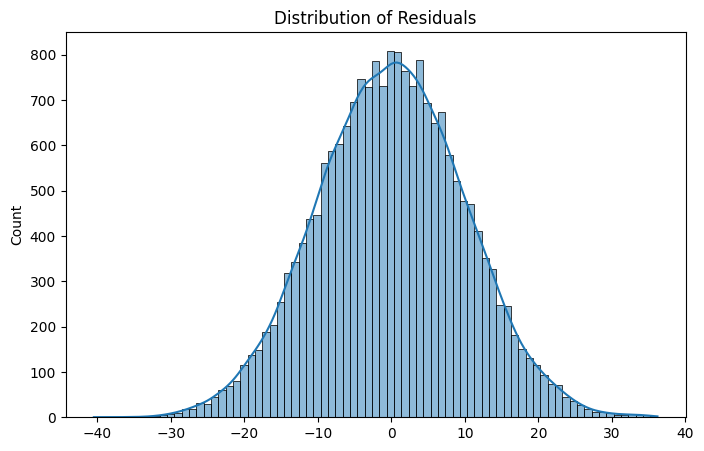

In [ ]:
# Checking residuals for model with interaction effects
y_pred_interaction = results_interaction.fittedvalues
residuals_interaction = results_interaction.resid

plt.figure(figsize=(8, 5))
sns.histplot(residuals_interaction, kde=True)
plt.title('Distribution of Residuals')
plt.show()

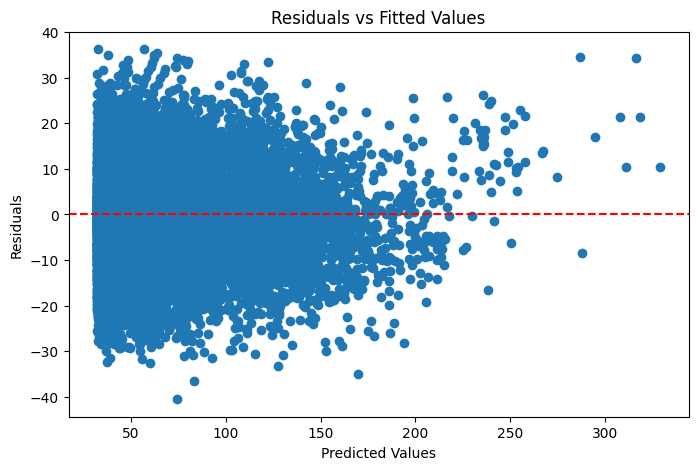

In [ ]:
# Residuals vs fitted values through a scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_interaction, residuals_interaction)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

### **Interaction Model Residual Graph Interpretations:**

**Distribution of Residuals Histogram**:
*   Matches the ideal case:
  *   Symmetrically distributed around zero, indicating that the model's errors are spread evenly across predictions.
  *   Following a normal distribution (bell-shaped) curve, which means the model is meeting normality.

**Residuals vs Fitted Values Scatter Plot**
*   Matches ideal case:
  *   Randomly scattered around zero with no clear pattern, indicating that the model is capturing the variable relationships and the residuals are independent of predicted values.


### **Interaction Residual Graph Analysis Takeaways:**

*   Unlike the initial model, where there was some evidence of heteroscedasticity, the interaction model does not display these issues.
*   The residual graphs have ideal properties for a regression model. Constant variance (no heteroscedasticity), normally distributed residuals, and independent errors ensure that the model captures the key relationships in the data and that its predictions are accurate.


### **Interaction model analysis plots using built in object**


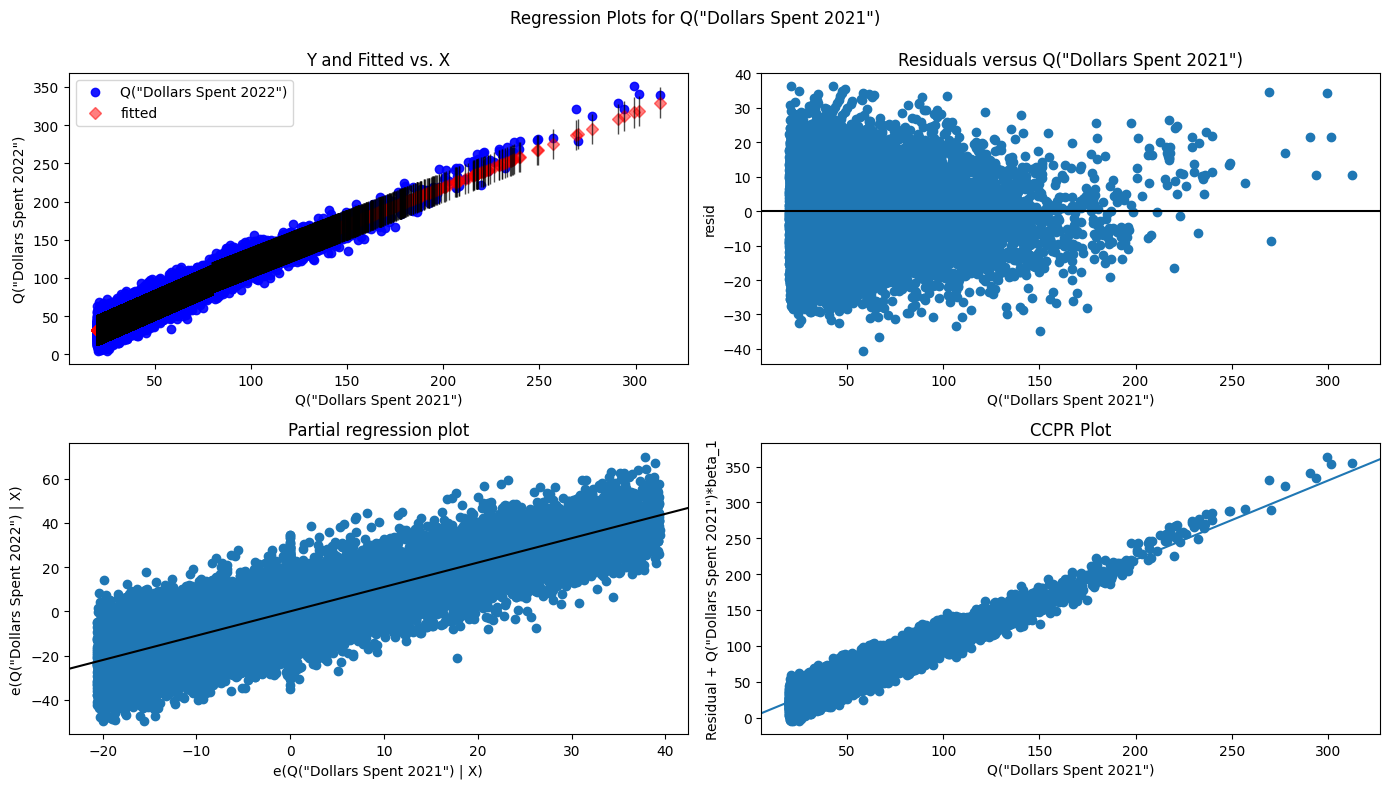

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Fit the OLS regression model with the interaction effect
interaction_model = ols('Q("Dollars Spent 2022") ~ Q("Dollars Spent 2021") + Treatment + Q("Dollars Spent 2021"):Treatment', data=df).fit()

# Creating diagnostic plots for the independent variable Dollars Spent 2021
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(interaction_model, 'Q("Dollars Spent 2021")', fig=fig)

plt.show()

### **Interaction Model Residual Graph Interpretations:**

*   Point are plotted with a random spread.
*   Since points are scatters around the '0' line, there is no visable pattern, and no skew to one side there's no concern for heteroscedasticity.


## *Interaction Model Fitted with Bandwidth*
Analyzing model fitted with chosen bandwidth of $55.

In [ ]:
# Filtering to desired bandwidth
filtered_df = df[(df['Dollars Spent 2021'] >= 80 - 55) & (df['Dollars Spent 2021'] <= 80 + 55)]
filtered_df.loc[:, 'Interaction'] = filtered_df['Dollars Spent 2021'] * filtered_df['Treatment']
X = filtered_df[['Dollars Spent 2021', 'Treatment', 'Interaction']]
X = sm.add_constant(X)
y = filtered_df['Dollars Spent 2022']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Dollars Spent 2022   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 3.833e+04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:19:18   Log-Likelihood:                -61122.
No. Observations:               16451   AIC:                         1.223e+05
Df Residuals:                   16447   BIC:                         1.223e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.0695      0

### **Interaction model OLS interpretations:**

#### **Overall Model**

*   R-squared: 0.875

The R-squared value indicates that 87.5% of the variation in Dollars Spent in 2022 can be explained by the model, which includes the constant, 2021 spending, treatment, and the interaction term as predictors. This value suggests that 12.8% of the variation remains unexplained, indicating a strong fit, as the model captures a significant portion of the variance in spending behavior.
*   No. Observations: 16451

This value represents the number of data points included in the bandwidth for the model analysis. Approximately 82.26% of the total data points were used.


#### **Coefficients**

*   Constant (Intercept) Coefficient: 10.0695

The constant coefficient represents the predicted average 2022 spending for customers who spent $0 in 2021 and did not receive the treatment. In this case, the predicted spending for such customers is approximately \$10.07.
*   Dollars Spent 2021 Coefficient: 1.0975
The coefficient for Dollars Spent in 2021 suggests that for every additional dollar spent in 2021, the expected spending in 2022 increases by approximately \$1.10. This positive relationship indicates that higher spending in 2021 is associated with an increase in spending in 2022.
*   Treatment Coefficient: 20.7680
This coefficient represents the average additional spending in 2022 for customers who received the treatment, compared to those who did not. Customers who received the treatment spent around \$20.77 more in 2022 on average.
*   Interaction Coefficient: -0.1993
The interaction term indicates how the effect of 2021 spending changes depending on whether the customer received the treatment. The negative coefficient suggests diminishing returns: as a customer’s spending in 2021 increases, the additional effect of receiving the treatment on their 2022 spending decreases.
*   P>|t|: 0.000 for all effects
A p-value of 0.000 across all effects suggests that each predictor in the model (constant, 2021 spending, treatment, and interaction) has a statistically significant impact on 2022 spending.

#### **Residual Analysis**

*   Omnibus: 1.132
The Omnibus test statistic, combined with the Prob(Omnibus) value of 0.568, indicates that the residuals are not significantly different from a normal distribution. This supports the assumption of normality for the residuals.
*   Skew: 0.000
The skew value is close to zero, showing that the residuals are symmetrically distributed around zero, further supporting the model’s validity.

### **OLS Takeaways:**

*   The R-squared of 0.875 indicates a strong fit, showing that the model explains a large portion of the variance in 2022 spending.
*   The negative interaction term suggests that as 2021 spending increases, the additional effect of receiving the treatment slightly diminishes.
*   The residual analysis confirms that the model satisfies the assumption of normality, making the model reliable in terms of statistical assumptions.


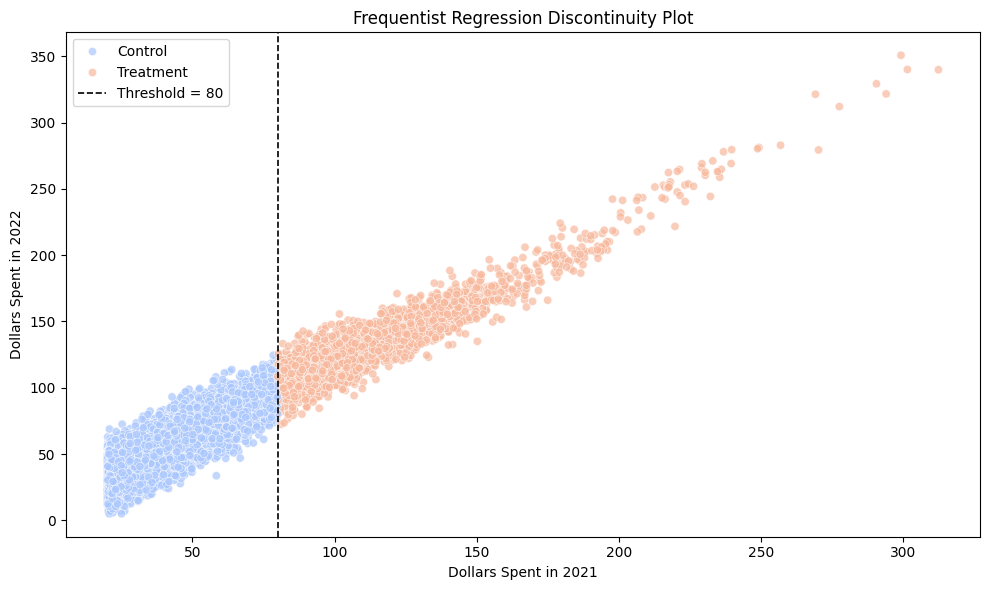

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define threshold and assign treatment group for clarity
threshold = 80
df['Treatment'] = (df['Dollars Spent 2021'] >= threshold).astype(int)

df['Treatment_Label'] = df['Treatment'].map({0: 'Control', 1: 'Treatment'})


# Create a scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dollars Spent 2021',
    y='Dollars Spent 2022',
    hue='Treatment_Label',
    data=df,
    palette='coolwarm',
    edgecolor='w',
    alpha=0.7
)

# Add a vertical line to indicate the threshold
plt.axvline(x=threshold, color='k', linestyle='--', linewidth=1.2, label=f'Threshold = {threshold}')

# Title and labels
plt.title('Frequentist Regression Discontinuity Plot')
plt.xlabel('Dollars Spent in 2021')
plt.ylabel('Dollars Spent in 2022')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

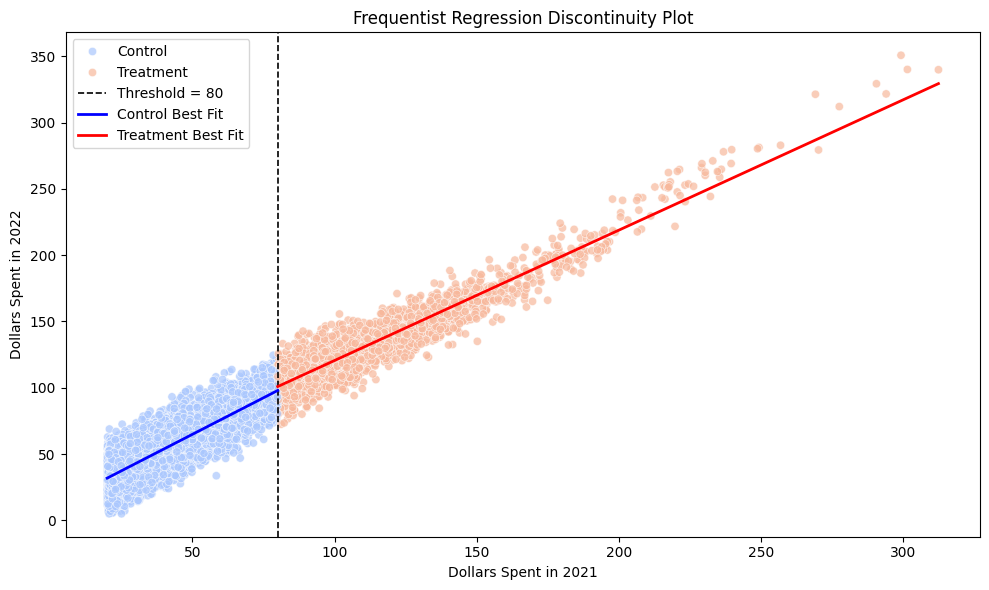

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = results_interaction.params
intercept = coefficients['const']
slope = coefficients['Dollars Spent 2021']
treatment_effect = coefficients['Treatment']
interaction_effect = coefficients['Interaction']

x_control = np.linspace(df['Dollars Spent 2021'].min(), threshold, 200)  # Control: x < 80
x_treatment = np.linspace(threshold, df['Dollars Spent 2021'].max(), 200)  # Treatment: x >= 80

fitted_control = intercept + slope * x_control  # For Treatment = 0
fitted_treatment = intercept + slope * x_treatment + treatment_effect + interaction_effect * x_treatment  # Treatment group


# Create a scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dollars Spent 2021',
    y='Dollars Spent 2022',
    hue='Treatment_Label',
    data=df,
    palette='coolwarm',
    edgecolor='w',
    alpha=0.7
)

# Add a vertical line to indicate the threshold and bandwidth
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=1.2, label=f'Threshold = {threshold}')

plt.plot(x_control, fitted_control, color='blue', label='Control Best Fit', linewidth=2)
plt.plot(x_treatment, fitted_treatment, color='red', label='Treatment Best Fit', linewidth=2)

# Title and labels
plt.title('Frequentist Regression Discontinuity Plot')
plt.xlabel('Dollars Spent in 2021')
plt.ylabel('Dollars Spent in 2022')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

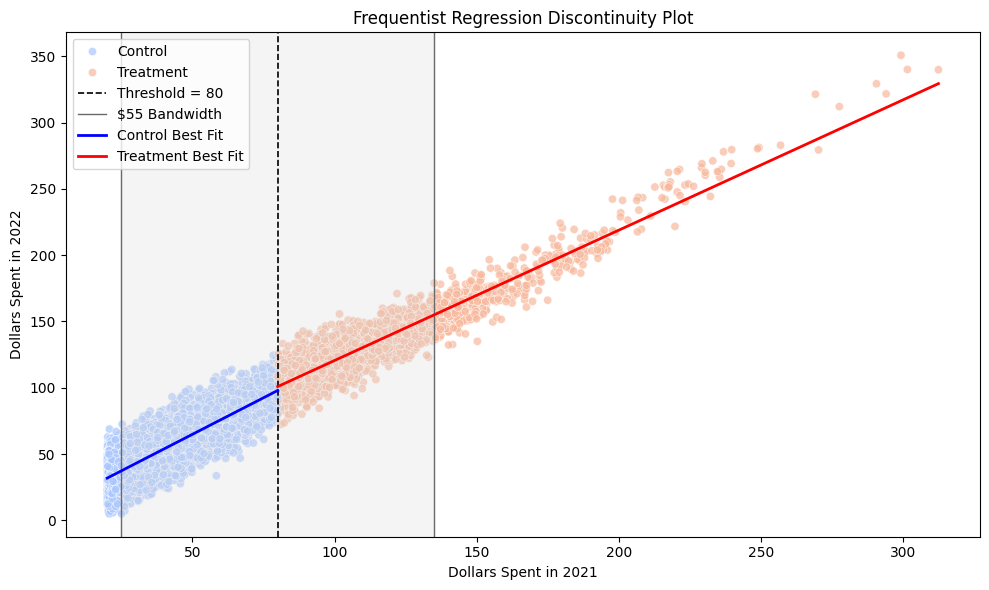

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coefficients = results_interaction.params
intercept = coefficients['const']
slope = coefficients['Dollars Spent 2021']
treatment_effect = coefficients['Treatment']
interaction_effect = coefficients['Interaction']

x_control = np.linspace(df['Dollars Spent 2021'].min(), threshold, 200)  # Control: x < 80
x_treatment = np.linspace(threshold, df['Dollars Spent 2021'].max(), 200)  # Treatment: x >= 80

fitted_control = intercept + slope * x_control  # For Treatment = 0
fitted_treatment = intercept + slope * x_treatment + treatment_effect + interaction_effect * x_treatment  # Treatment group

# Create a scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dollars Spent 2021',
    y='Dollars Spent 2022',
    hue='Treatment_Label',
    data=df,
    palette='coolwarm',
    edgecolor='w',
    alpha=0.7
)

# Add a vertical line to indicate the threshold and bandwidth
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=1.2, label=f'Threshold = {threshold}')

plt.axvline(x=threshold - 55, color='dimgrey', linestyle='-', linewidth=1, label=f'$55 Bandwidth')
plt.axvline(x=threshold + 55, color='dimgrey', linestyle='-', linewidth=1)
plt.axvspan(threshold - 55, threshold + 55, color='gainsboro', alpha=0.3)

plt.plot(x_control, fitted_control, color='blue', label='Control Best Fit', linewidth=2)
plt.plot(x_treatment, fitted_treatment, color='red', label='Treatment Best Fit', linewidth=2)

# Title and labels
plt.title('Frequentist Regression Discontinuity Plot')
plt.xlabel('Dollars Spent in 2021')
plt.ylabel('Dollars Spent in 2022')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

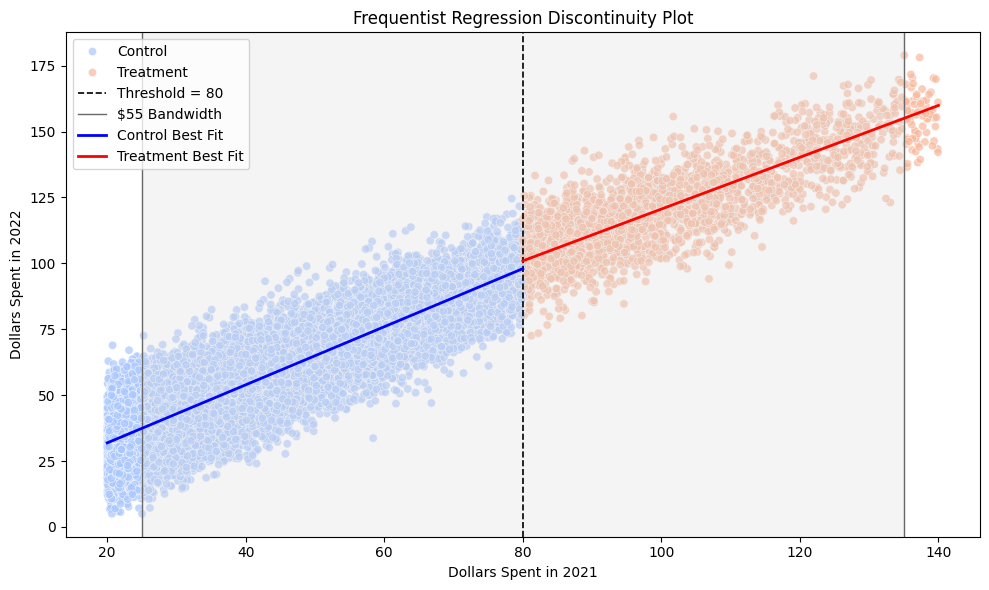

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

partial_min = 20
partial_max = 140

# Define x-range for control and treatment within the partial range
x_control_partial = np.linspace(partial_min, min(threshold, partial_max), 200)
x_treatment_partial = np.linspace(max(threshold, partial_min), partial_max, 200)

# Compute fitted lines for the partial range
fitted_control_partial = intercept + slope * x_control_partial
fitted_treatment_partial = (
    intercept + slope * x_treatment_partial + treatment_effect + interaction_effect * x_treatment_partial
)

# Subset data for scatter plot within the partial range
df_partial = df[(df['Dollars Spent 2021'] >= partial_min) & (df['Dollars Spent 2021'] <= partial_max)]


# Create a scatter plot to show the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Dollars Spent 2021',
    y='Dollars Spent 2022',
    hue='Treatment_Label',
    data=df_partial,
    palette='coolwarm',
    edgecolor='w',
    alpha=0.7
)

# Add a vertical line to indicate the threshold and bandwidth
plt.axvline(x=threshold, color='black', linestyle='--', linewidth=1.2, label=f'Threshold = {threshold}')

plt.axvline(x=threshold - 55, color='dimgrey', linestyle='-', linewidth=1, label=f'$55 Bandwidth')
plt.axvline(x=threshold + 55, color='dimgrey', linestyle='-', linewidth=1)
plt.axvspan(threshold - 55, threshold + 55, color='gainsboro', alpha=0.3)

plt.plot(x_control_partial, fitted_control_partial, color='blue', label='Control Best Fit', linewidth=2)
plt.plot(x_treatment_partial, fitted_treatment_partial, color='red', label='Treatment Best Fit', linewidth=2)

# Title and labels
plt.title('Frequentist Regression Discontinuity Plot')
plt.xlabel('Dollars Spent in 2021')
plt.ylabel('Dollars Spent in 2022')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()